# LOGISTIC REGRESSION

**Reading diabetes dataset**

In [24]:
import pandas as pd
data = pd.read_csv("diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0      0.0  33.6   
1          1.0       85           66.0           29.0      0.0  26.6   
2          8.0      183           64.0            0.0      0.0  23.3   
3          1.0       89           66.0           23.0     94.0  28.1   
4          NaN      137           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288   NaN      1.0  


#  Pre-processing
Dropping the Rows that contain missing values


Reshaping the columns If not done then it will lead to error

In [25]:
data=data.dropna()
#split dataset in features and target variable
X = data.Glucose.values.reshape(-1, 1)  # Features
y = data.Outcome.values.reshape(-1, 1)  # Target variable

**Splitting the dataset**

In [27]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=42)

In [28]:
# import the class
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Prediction**

In [29]:
y_pred=reg.predict(x_test)

Predicting values for the custom data

In [44]:
X_new = [10]
predict=reg.predict([X_new])
print(predict)

[0.]


**Confusion Matrix**

In [31]:
# import the metrics class
from sklearn.metrics import confusion_matrix 
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print(conf_matrix)

True Negative: 121
False Positive: 13
False Negative: 41
True Positive: 25
[[ 25  41]
 [ 13 121]]


Text(0.5, 1.0, 'Confusion Matrix')

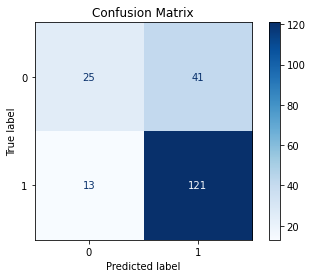

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

**Precision**

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,matthews_corrcoef
print("Accuracy is", accuracy_score(y_test, y_pred))
print("Precision is", precision_score(y_test, y_pred))
print("Recall is", recall_score(y_test, y_pred))
print("F1 Score is", f1_score(y_test, y_pred))
print("Matthews Correlation Coefficient is", matthews_corrcoef(y_test, y_pred))
# Printing the metrics that are not available in the sklearn library
print('The sensitivity/Recall/True Positive Rate is', TP/(TP+FN))
print('The specificity/ True Negative Rate is', TN/(TN+FP))

Precision is 0.6578947368421053
Recall is 0.3787878787878788
F1 Score is 0.4807692307692307
Accuracy is 0.73
Matthews Correlation Coefficient is 0.3377336747690778


**Errors**

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error = ",mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error = ",mse)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error = ",rmse)

Mean Absolute Error =  0.27
Mean Squared Error =  0.27
Root Mean Squared Error =  0.5196152422706632


**ROC and AUC**

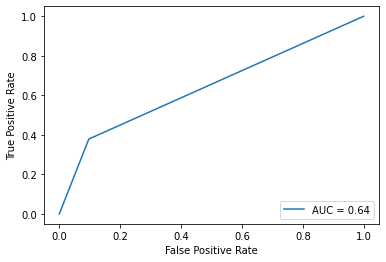

In [35]:
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

# INFERENCE

With an AUC (Area under the curve) of 0.778, a fair classification has been made.

The Mean Absolute Error and Mean Squared Error of 0.275 represents an acceptable model.

**COMPARISION**

In uni-variant only insulin was considered as a feature which affects the target output of being diabetic or not. Whereas in multi-variant various features were considered. 

In multi-variant there are 95 true positives whereas in uni-variant there are 113.

The accuracy rate in both are similar with 72 percentage

The precision in multi-variant is 0.616 and in uni-variant it's a similar value of 0.653.